In [28]:
import pandas as pd

df = pd.read_csv('conversation_rate.csv',sep=';')
df.head()

,Id,Age,Gender,Geographic location,Marital status,Education level,Occupation,Occupation level,Individual income level,Conversation
0,1,43,1,3,1,1,1,2,5,1
1,2,59,1,1,1,2,3,3,5,1
2,3,18,0,3,0,2,2,3,1,0
3,4,65,1,1,1,1,3,2,3,0
4,5,39,1,2,1,1,3,2,3,1


In [29]:
df = df.iloc[:, 1:]
df.head()

,Age,Gender,Geographic location,Marital status,Education level,Occupation,Occupation level,Individual income level,Conversation
0,43,1,3,1,1,1,2,5,1
1,59,1,1,1,2,3,3,5,1
2,18,0,3,0,2,2,3,1,0
3,65,1,1,1,1,3,2,3,0
4,39,1,2,1,1,3,2,3,1


In [30]:
styled_df = df.style.set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center')]
}])

styled_df

,Age,Gender,Geographic location,Marital status,Education level,Occupation,Occupation level,Individual income level,Conversation
0,43,1,3,1,1,1,2,5,1
1,59,1,1,1,2,3,3,5,1
2,18,0,3,0,2,2,3,1,0
3,65,1,1,1,1,3,2,3,0
4,39,1,2,1,1,3,2,3,1
5,79,0,2,0,1,1,1,5,1
6,32,1,3,0,3,3,2,1,0
7,21,1,2,0,2,2,2,1,0
8,43,0,3,1,3,3,3,2,0
9,37,0,2,1,3,1,2,5,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['Age', 'Gender', 'Geographic location', 'Marital status', 'Education level', 'Occupation', 'Occupation level', 'Individual income level']]

y = df['Conversation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
baseline = df['Conversation'].value_counts(normalize=True).max()
print("Baseline:", baseline)

Baseline: 0.504


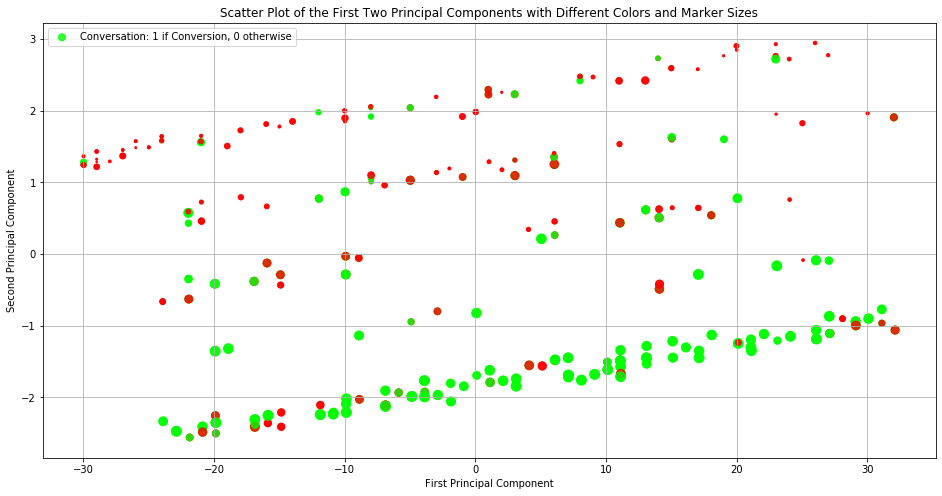

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

y_prob = log_reg.predict_proba(X)[:, 1]

sizes = 100 * y_prob

colors = ['lime' if label == 1 else 'red' for label in y]

plt.figure(figsize=(16, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=sizes, alpha=0.8, label='Conversation: 1 if Conversion, 0 otherwise')
plt.title('Scatter Plot of the First Two Principal Components with Different Colors and Marker Sizes')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
df['Probability'] = log_reg.predict_proba(X)[:, 1].round(2)

styled_df = df.style.set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center')]
}])

styled_df

,Age,Gender,Geographic location,Marital status,Education level,Occupation,Occupation level,Individual income level,Conversation,Probability
0,43,1,3,1,1,1,2,5,1,0.94
1,59,1,1,1,2,3,3,5,1,0.86
2,18,0,3,0,2,2,3,1,0,0.24
3,65,1,1,1,1,3,2,3,0,0.26
4,39,1,2,1,1,3,2,3,1,0.45
5,79,0,2,0,1,1,1,5,1,0.38
6,32,1,3,0,3,3,2,1,0,0.19
7,21,1,2,0,2,2,2,1,0,0.12
8,43,0,3,1,3,3,3,2,0,0.66
9,37,0,2,1,3,1,2,5,1,0.93


In [26]:
from scipy.stats import mannwhitneyu

sample1 = [0.52] * 500 
sample2 = [0.65] * 500  

statistic, p_value = mannwhitneyu(sample1, sample2)

print("Mann-Whitney U Test Results:")
print(f"Test Statistic = {statistic:.2f}")
print(f"p-value = {p_value:.2f}")





Mann-Whitney U Test Results:
Test Statistic = 0.00
p-value = 0.00
